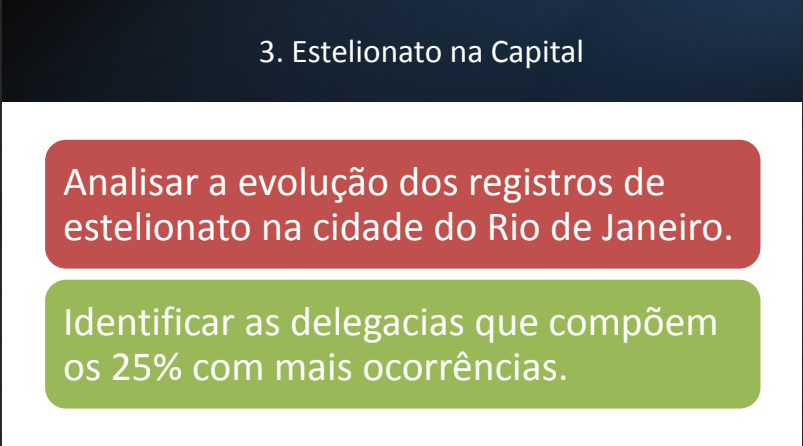

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
base_dados = pd.read_csv("BaseDPEvolucaoMensalCisp.csv",sep = ";", encoding="latin1")
base_dados.columns

In [ ]:
base_capital = base_dados[base_dados["regiao"] == "Capital" ]
base_capital = base_capital.groupby("cisp")[["estelionato"]].sum().reset_index()
base_capital

In [ ]:
base_capital = base_capital.values
base_capital

In [15]:
valores = base_capital[:, 1].astype(float)

media = np.mean(base_capital)
mediana = np.median(base_capital)
distancia = (media - mediana) / mediana
desvio_padrao = np.std(base_capital)
variancia = np.var(base_capital)
q1 = np.percentile(base_capital, 25)
q2 = np.percentile(base_capital, 50)
q3 = np.percentile(base_capital, 75)
minimo = np.min(base_capital)
maximo = np.max(base_capital)
iqr = q3 - q1
cv = (desvio_padrao / media) * 100 # Coeficiente de variação
distancia_variancia = (variancia / (media ** 2)) * 100 # Coeficiente de Pearson

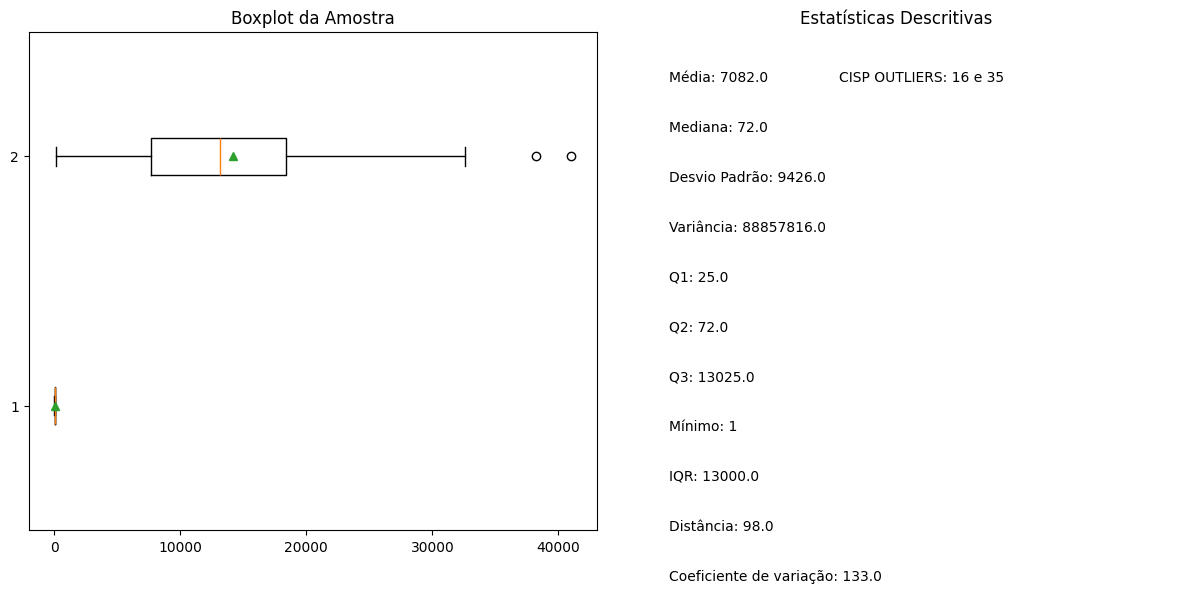

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].boxplot(base_capital, vert=False,showmeans=True)
axs[0].set_title("Boxplot da Amostra")                                      

axs[1].axis("off")
axs[1].set_title("Estatísticas Descritivas")
axs[1].text(0.1, 0.9, f"Média: {media.round()}")
axs[1].text(0.4, 0.9, f"CISP OUTLIERS: 16 e 35")
axs[1].text(0.1, 0.8, f"Mediana: {mediana.round()}")
axs[1].text(0.1, 0.7, f"Desvio Padrão: {desvio_padrao.round()}")
axs[1].text(0.1, 0.6, f"Variância: {variancia.round()}")
axs[1].text(0.1, 0.5, f"Q1: {q1.round()}")
axs[1].text(0.1, 0.4, f"Q2: {q2.round()}")
axs[1].text(0.1, 0.3, f"Q3: {q3.round()}")
axs[1].text(0.1, 0.2, f"Mínimo: {minimo.round()}")
axs[1].text(0.1, 0.1, f"IQR: {iqr.round()}")
axs[1].text(0.1, 0.0, f"Distância: {distancia.round()}")
axs[1].text(0.1, -0.1, f"Coeficiente de variação: {cv.round()}")

plt.tight_layout()
plt.show()